# Customer Churn Prediction Using Artificial Neural Network 

Customer churn prediction is the process of estimating the likelihood that a customer will stop using a company's products or services. This is especially important for businesses with repeat customers or subscription-based models.

To keep a healthy customer base, companies need to track which customers are likely to leave and understand the reasons behind it. This requires analyzing customer behavior, usage patterns, and other attributes that may indicate the risk of churn.

In this project, we build a Artificial Neural Network model to predict the churn, helping business take proactive steps to retain customers.

In [231]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np 
import seaborn as sns
import random
from sklearn.preprocessing import MinMaxScaler

In [232]:
df = pd.read_csv(r"C:\Users\sowmy\OneDrive\Desktop\Deep Learning\DL ANN data set\WA_Fn-UseC_-Telco-Customer-Churn.csv")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [233]:
df.shape

(7043, 21)

In [234]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

* The dataset has no duplicate rows.

In [235]:
duplicates = df.duplicated().sum()
print(f"No of duplicate rows: {duplicates}")

No of duplicate rows: 0


* Dropping the CustomerID column, which has no effect on predicting churn

In [236]:
df.drop('customerID', axis = 'columns', inplace= True)
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [237]:
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

* The **TotalCharges** column is stored as an object but should be converted to a float for accurate analysis.

In [238]:
df.TotalCharges.values

array(['29.85', '1889.5', '108.15', ..., '346.45', '306.6', '6844.5'],
      dtype=object)

* The values are in string format. Convert into float

In [240]:
pd.to_numeric(df.TotalCharges)

ValueError: Unable to parse string " " at position 488

* Some of the values are empty string which can't be converted into numeric

In [241]:
df[df['TotalCharges'].str.strip() == '']

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [242]:
(df['TotalCharges'].str.strip() == '').sum()

11

* There are 11 rows where the column **TotalCharges** has empty strings. Now remove those rows from the data

In [243]:
df = df[df['TotalCharges'].str.strip() != '']

In [244]:
df.shape

(7032, 20)

In [245]:
df.TotalCharges = pd.to_numeric(df.TotalCharges)

In [246]:
df.TotalCharges.dtypes

dtype('float64')

# Exploratory Data Analysis

In [247]:
print(df['Churn'].value_counts())

No     5163
Yes    1869
Name: Churn, dtype: int64


* We divide the columns of the DataFrame into two separate lists — categorical columns and numerical columns — based on the number of unique values in each column.

In [249]:
# segment the columns of the DataFrame into two lists based on the number of unique values each column contains.
cat_col = []
num_col = []
for column in df.columns:
    unique_value = df[column].nunique()
    if unique_value <= 20:
        cat_col.append(column)
    else:
        num_col.append(column)  

* Visualize the distribution of each categorical column in the dataset.
* Each subplot represents the frequency of different categories for one feature.

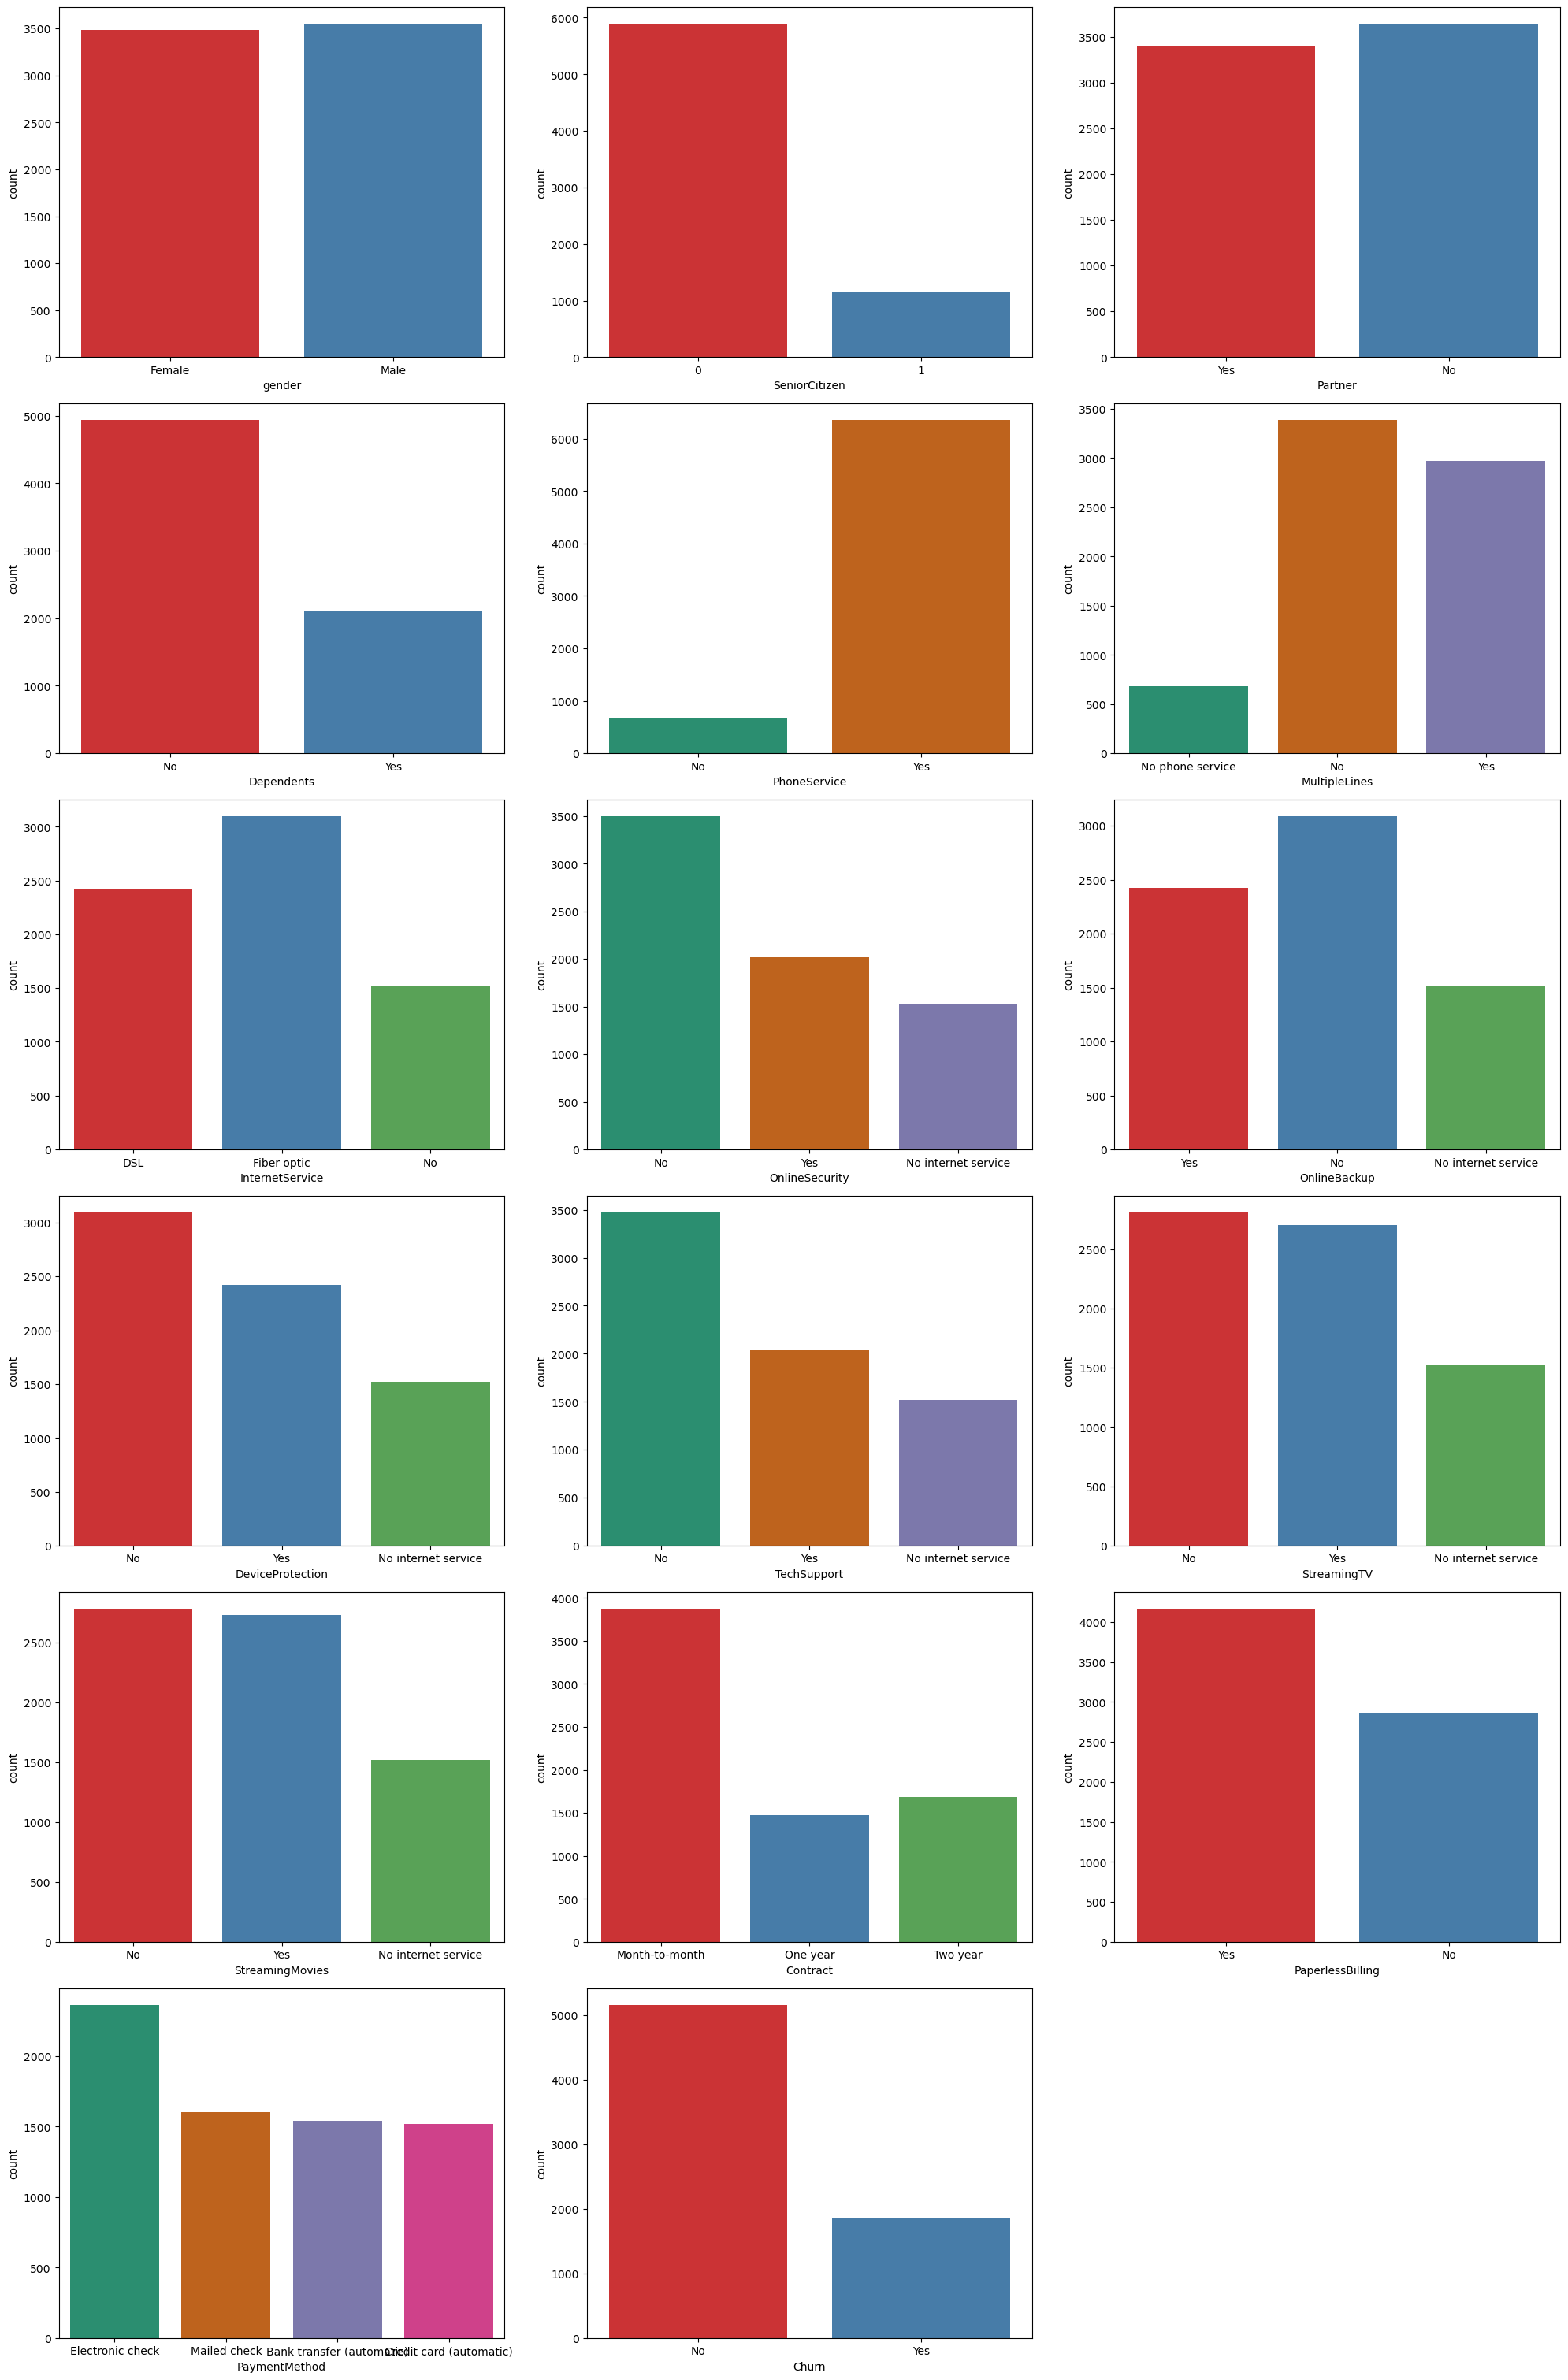

In [250]:
plt.figure(figsize=(20, 50))
plot_num = 1

palettes = ["Set1", "Dark2"]

for col in cat_col:
    plt.subplot(10, 3, plot_num)
    sns.countplot(data=df, x=col, hue=col, legend=False, palette = random.choice(palettes))  
    plot_num += 1

plt.tight_layout()
plt.show()

* Histograms for all numerical columns in the dataset to visualize how their values are distributed.
* Helps identify distribution shapes (normal, skewed, etc.).

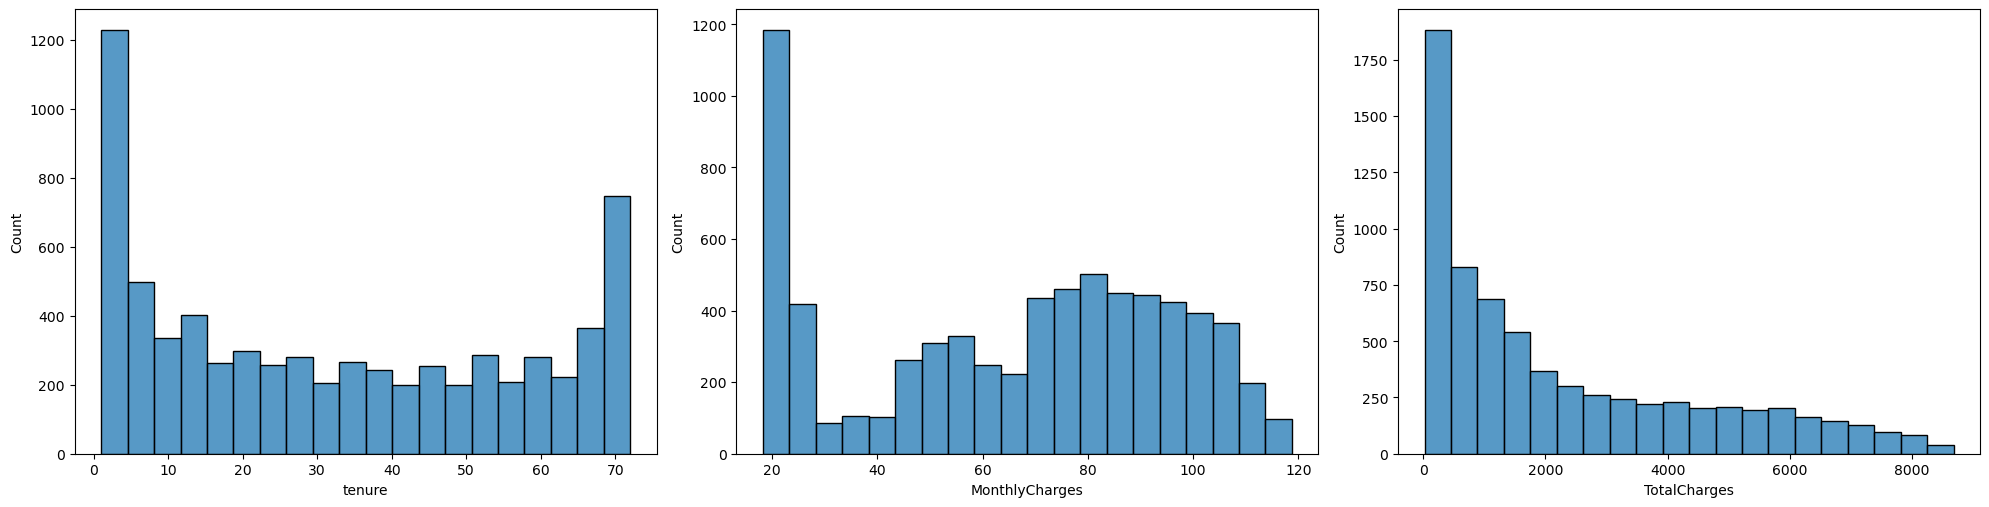

In [251]:
plt.figure(figsize=(20, 50))
plot_num = 1

for col in num_col:
    plt.subplot(10, 3, plot_num)
    sns.histplot(data=df, x=col, bins = 20)
    plot_num += 1

plt.tight_layout()
plt.show()

* Count plots for all categorical features (except the target variable Churn) to visualize how churn is distributed across each category.
* Highlights which categories have higher churn rates.

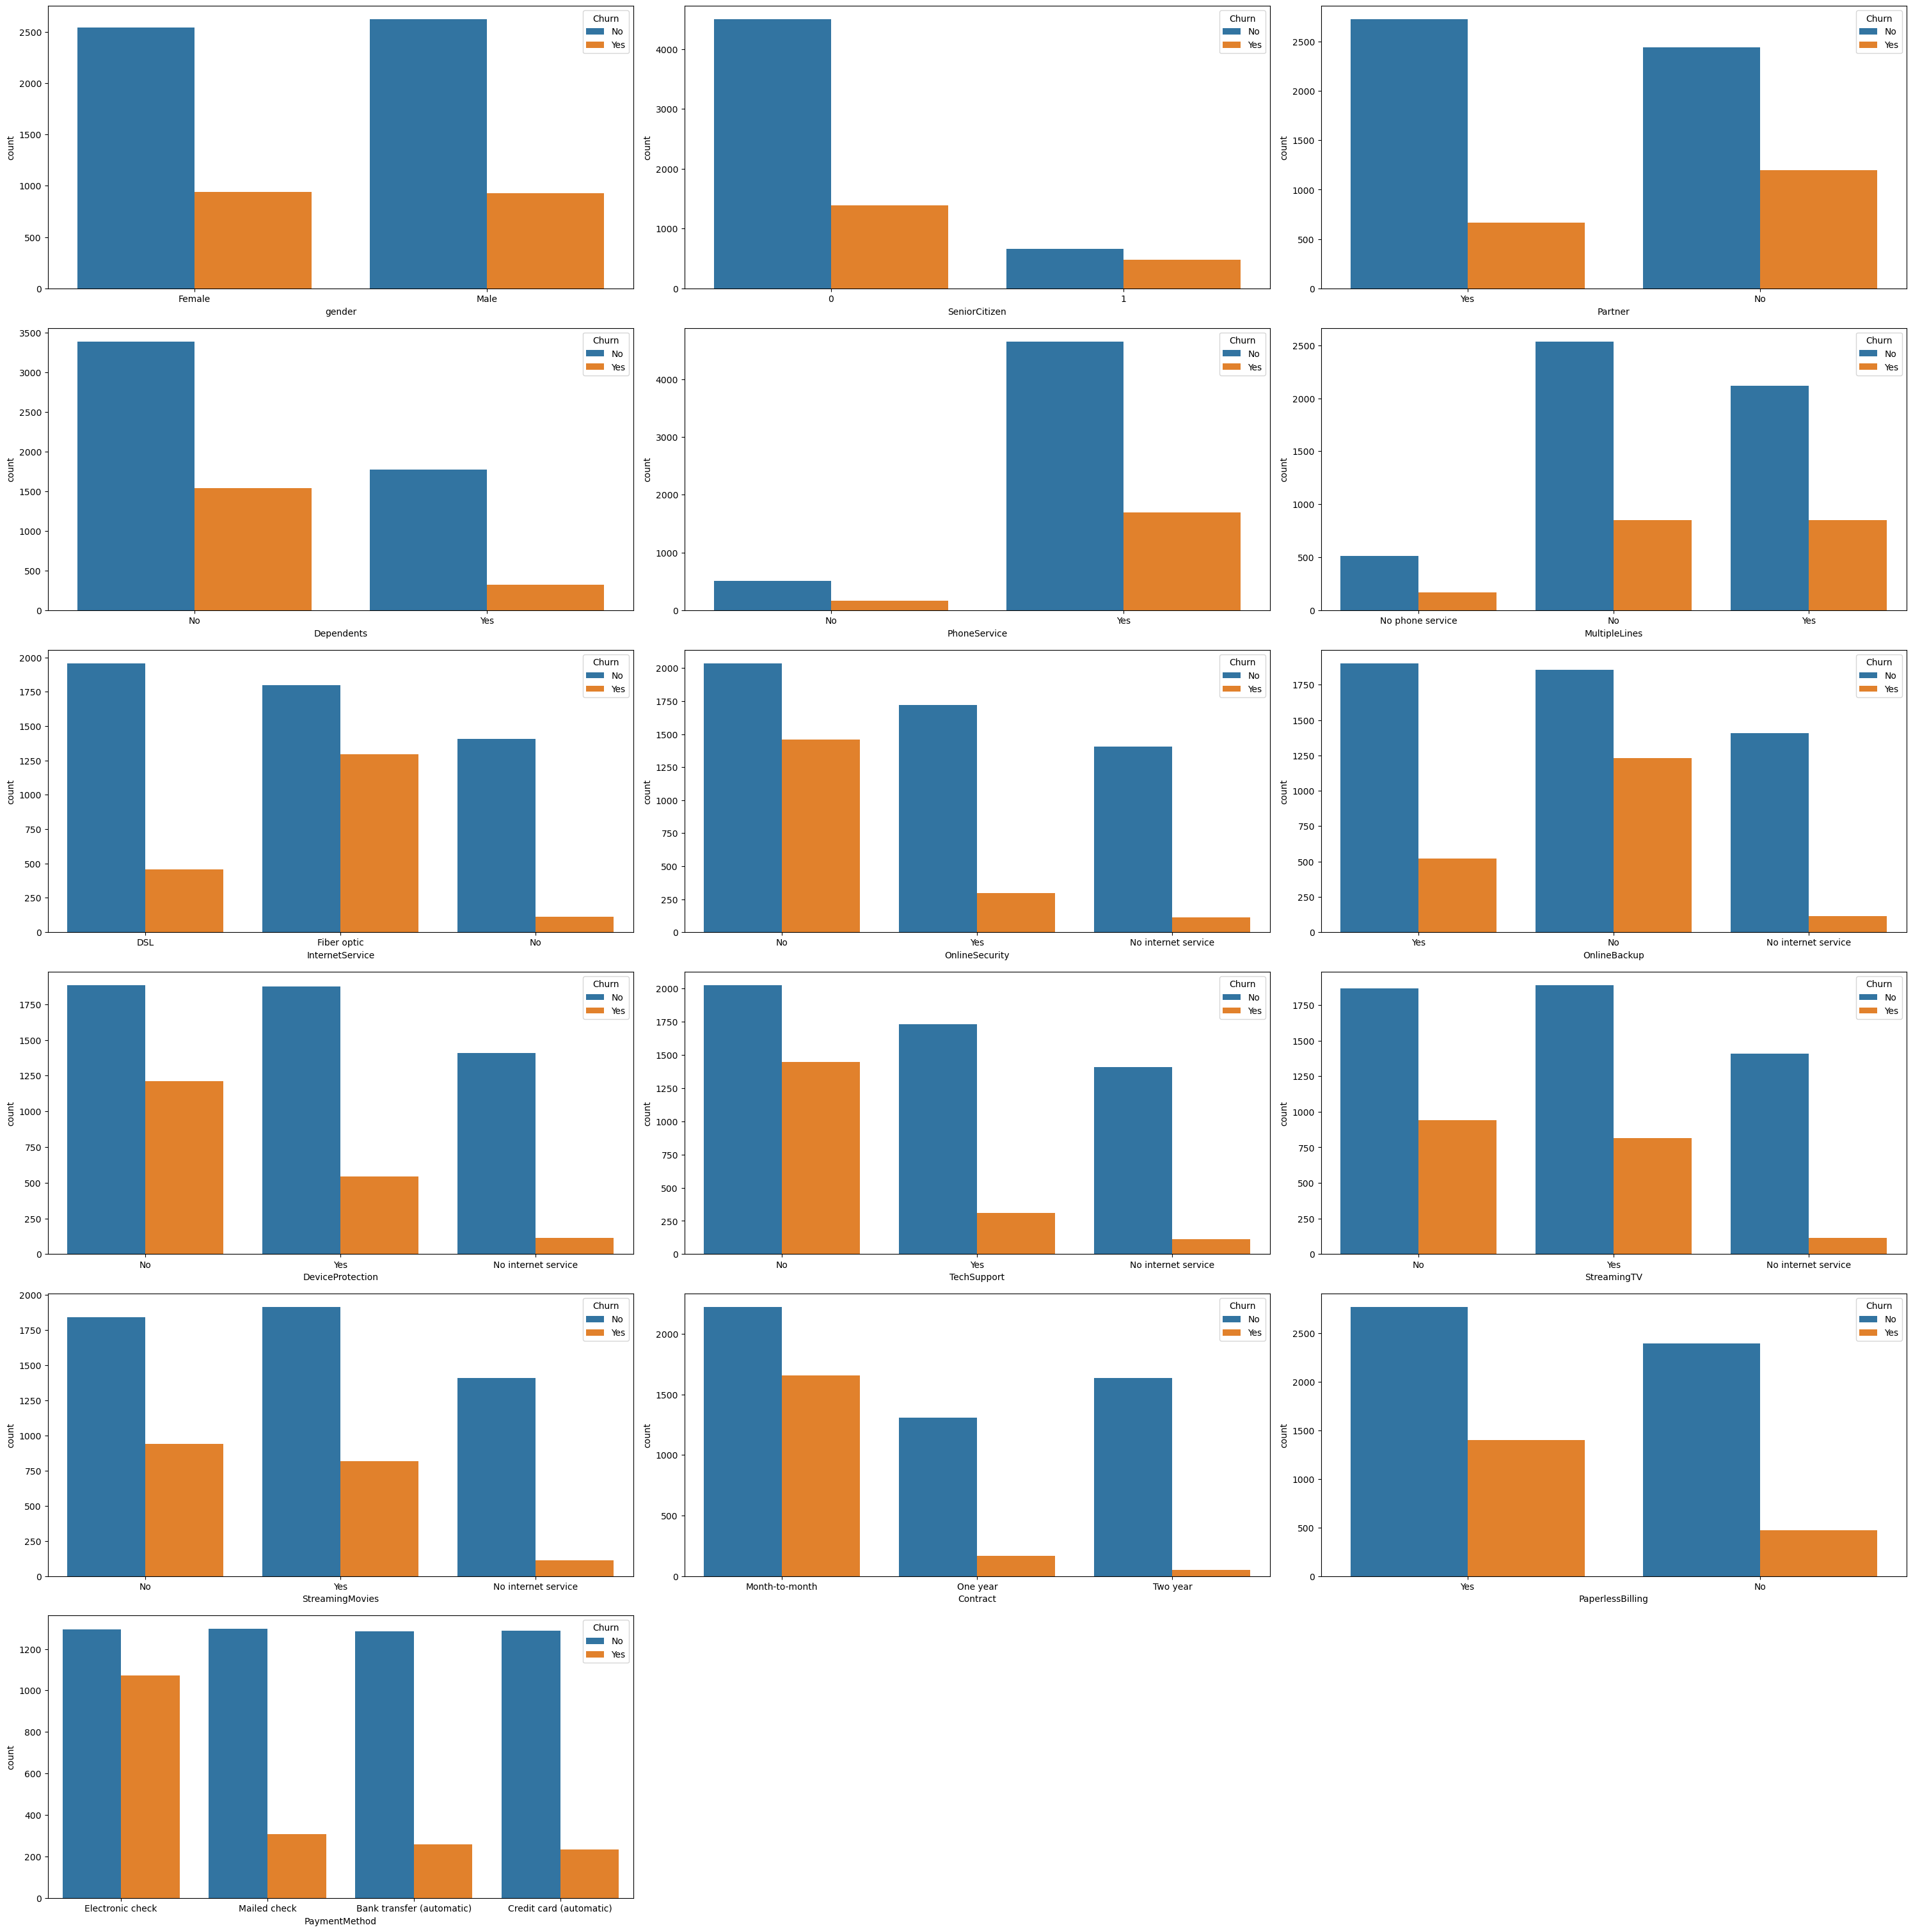

In [252]:
plt.figure(figsize=(30,50))
plot_num = 1
for col in cat_col:
    if  col != "Churn":
        plt.subplot(10,3,plot_num)
        sns.countplot(data=df, x=col, hue="Churn")
        plot_num += 1
        plt.tight_layout()

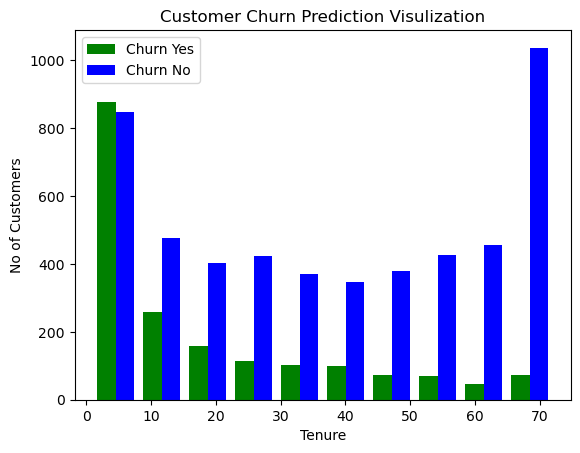

In [253]:
tenure_churn_no = df[df.Churn=='No'].tenure
tenure_churn_yes = df[df.Churn=='Yes'].tenure

plt.xlabel('Tenure')
plt.ylabel('No of Customers')
plt.title("Customer Churn Prediction Visulization")
plt.hist([tenure_churn_yes,tenure_churn_no],color=['Green',"blue"],label=['Churn Yes','Churn No'])
plt.legend()

* All the unique values for each column in dataframe

In [254]:
for column in df:
    print(f'{column} : {df[column].unique()}')

gender : ['Female' 'Male']
SeniorCitizen : [0 1]
Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']
tenure : [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService : ['No' 'Yes']
MultipleLines : ['No phone service' 'No' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'Yes' 'No internet service']
OnlineBackup : ['Yes' 'No' 'No internet service']
DeviceProtection : ['No' 'Yes' 'No internet service']
TechSupport : ['No' 'Yes' 'No internet service']
StreamingTV : ['No' 'Yes' 'No internet service']
StreamingMovies : ['No' 'Yes' 'No internet service']
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : ['Yes' 'No']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges : [29.85 56.95 53.85 ... 63.1  44.2  78

* All the unique values for categorical columns in a DataFrame.

In [255]:
def print_unique_col_values(df):
    for column in df:
        if df[column].dtypes == 'object':
            print(f'{column} : {df[column].unique()}')

In [256]:
print_unique_col_values(df)

gender : ['Female' 'Male']
Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']
PhoneService : ['No' 'Yes']
MultipleLines : ['No phone service' 'No' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'Yes' 'No internet service']
OnlineBackup : ['Yes' 'No' 'No internet service']
DeviceProtection : ['No' 'Yes' 'No internet service']
TechSupport : ['No' 'Yes' 'No internet service']
StreamingTV : ['No' 'Yes' 'No internet service']
StreamingMovies : ['No' 'Yes' 'No internet service']
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : ['Yes' 'No']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn : ['No' 'Yes']


* In several columns, one of the unique values was "No internet service".

* Since having no internet service in this context means the customer cannot use that feature, it is effectively the same as "No" for that service. Keeping it as a separate category would unnecessarily increase the number of unique values and make the model treat it as a distinct case, even though it means the same as "No" in terms of service availability.

In [257]:
df.replace('No internet service','No',inplace = True)

In [258]:
df.replace('No phone service','No',inplace = True)

In [259]:
print_unique_col_values(df)

gender : ['Female' 'Male']
Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']
PhoneService : ['No' 'Yes']
MultipleLines : ['No' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'Yes']
OnlineBackup : ['Yes' 'No']
DeviceProtection : ['No' 'Yes']
TechSupport : ['No' 'Yes']
StreamingTV : ['No' 'Yes']
StreamingMovies : ['No' 'Yes']
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : ['Yes' 'No']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn : ['No' 'Yes']


* Converted Yes/No values in selected columns to 1/0 values for easier analysis.

In [260]:
yes_no_columns = ['Partner','Dependents','PhoneService','MultipleLines','OnlineSecurity','OnlineBackup',
                  'DeviceProtection','TechSupport','StreamingTV','StreamingMovies','PaperlessBilling','Churn']

for col in yes_no_columns:
    df[col].replace({'Yes': 1,'No' : 0},inplace=True)

In [261]:
for col in df:
    print(f'{col} : {df[col].unique()}')

gender : ['Female' 'Male']
SeniorCitizen : [0 1]
Partner : [1 0]
Dependents : [0 1]
tenure : [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService : [0 1]
MultipleLines : [0 1]
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : [0 1]
OnlineBackup : [1 0]
DeviceProtection : [0 1]
TechSupport : [0 1]
StreamingTV : [0 1]
StreamingMovies : [0 1]
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : [1 0]
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges : [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges : [  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
Churn : [0 1]


In [262]:
df['gender'].replace({'Female' : 1, 'Male' : 0},inplace=True)

In [263]:
df['gender'].unique()

array([1, 0], dtype=int64)

### One Hot Encoding

* Some columns have more than 2 different classes. Use One-Hot Encoding to convert them into different binary columns (one for each category).

In [264]:
df = pd.get_dummies(data = df, columns = ['InternetService','Contract','PaymentMethod'])
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'PaperlessBilling', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No', 'Contract_Month-to-month', 'Contract_One year',
       'Contract_Two year', 'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')

In [265]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,0,1,0,1,0,0,0,1,0,...,1,0,0,1,0,0,0,0,1,0
1,0,0,0,0,34,1,0,1,0,1,...,1,0,0,0,1,0,0,0,0,1
2,0,0,0,0,2,1,0,1,1,0,...,1,0,0,1,0,0,0,0,0,1
3,0,0,0,0,45,0,0,1,0,1,...,1,0,0,0,1,0,1,0,0,0
4,1,0,0,0,2,1,0,0,0,0,...,0,1,0,1,0,0,0,0,1,0


In [266]:
df.dtypes

gender                                       int64
SeniorCitizen                                int64
Partner                                      int64
Dependents                                   int64
tenure                                       int64
PhoneService                                 int64
MultipleLines                                int64
OnlineSecurity                               int64
OnlineBackup                                 int64
DeviceProtection                             int64
TechSupport                                  int64
StreamingTV                                  int64
StreamingMovies                              int64
PaperlessBilling                             int64
MonthlyCharges                             float64
TotalCharges                               float64
Churn                                        int64
InternetService_DSL                          uint8
InternetService_Fiber optic                  uint8
InternetService_No             

#### Scale the dataset

* Some of the columns are not in the range 0 to 1. So they needed to be scaled. 


In [267]:
cols_to_scale = ['tenure','MonthlyCharges','TotalCharges']

scaler = MinMaxScaler()

df[cols_to_scale] = scaler.fit_transform(df[cols_to_scale])

In [268]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,0,1,0,0.000000,0,0,0,1,0,...,1,0,0,1,0,0,0,0,1,0
1,0,0,0,0,0.464789,1,0,1,0,1,...,1,0,0,0,1,0,0,0,0,1
2,0,0,0,0,0.014085,1,0,1,1,0,...,1,0,0,1,0,0,0,0,0,1
3,0,0,0,0,0.619718,0,0,1,0,1,...,1,0,0,0,1,0,1,0,0,0
4,1,0,0,0,0.014085,1,0,0,0,0,...,0,1,0,1,0,0,0,0,1,0


In [269]:
for col in df:
    print(f'{col} : {df[col].unique()}')

gender : [1 0]
SeniorCitizen : [0 1]
Partner : [1 0]
Dependents : [0 1]
tenure : [0.         0.46478873 0.01408451 0.61971831 0.09859155 0.29577465
 0.12676056 0.38028169 0.85915493 0.16901408 0.21126761 0.8028169
 0.67605634 0.33802817 0.95774648 0.71830986 0.98591549 0.28169014
 0.15492958 0.4084507  0.64788732 1.         0.22535211 0.36619718
 0.05633803 0.63380282 0.14084507 0.97183099 0.87323944 0.5915493
 0.1971831  0.83098592 0.23943662 0.91549296 0.11267606 0.02816901
 0.42253521 0.69014085 0.88732394 0.77464789 0.08450704 0.57746479
 0.47887324 0.66197183 0.3943662  0.90140845 0.52112676 0.94366197
 0.43661972 0.76056338 0.50704225 0.49295775 0.56338028 0.07042254
 0.04225352 0.45070423 0.92957746 0.30985915 0.78873239 0.84507042
 0.18309859 0.26760563 0.73239437 0.54929577 0.81690141 0.32394366
 0.6056338  0.25352113 0.74647887 0.70422535 0.35211268 0.53521127]
PhoneService : [0 1]
MultipleLines : [0 1]
OnlineSecurity : [0 1]
OnlineBackup : [1 0]
DeviceProtection : [0 1]
Tech

## Training and Test Data

* The dataset is split into features (X) and target (y), followed by a train-test split with 20% of the data reserved for testing and stratification applied to maintain the class distribution. Class weights are computed using the training labels to handle class imbalance, ensuring that each class contributes proportionally during model training.

In [270]:
X = df.drop('Churn', axis = 'columns')
y = df['Churn']

In [271]:
from sklearn.model_selection import train_test_split
X_train ,X_test ,y_train, y_test = train_test_split(X,y,test_size=0.2,random_state = 5, stratify = y)

In [272]:
print(f'The shape of X_train is {X_train.shape}')
print(f'The shape of X_test is {X_test.shape}')
print(f'The shape of y_train is {y_train.shape}')
print(f'The shape of y_test is {y_test.shape}')

The shape of X_train is (5625, 26)
The shape of X_test is (1407, 26)
The shape of y_train is (5625,)
The shape of y_test is (1407,)


In [273]:
from sklearn.utils.class_weight import compute_class_weight
import numpy as np

class_weights = compute_class_weight(
    class_weight='balanced',
    classes=np.unique(y_train),
    y=y_train
)
class_weights = dict(enumerate(class_weights))


## Model Building 

A neural network model is defined using a Sequential architecture with two hidden layers (64 and 32 neurons) and a dropout layer to prevent overfitting. The model is compiled with the Adam optimizer, binary cross-entropy loss, and accuracy metric, and then trained on the training set with class weights applied to address imbalance.

Predictions are generated on the test set, and evaluation metrics including accuracy, classification report, and confusion matrix are produced to assess model performance. Training history is visualized through plots of loss and accuracy over epochs for both training and validation sets to monitor learning trends. 

In [274]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.5),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

c:\Users\sowmy\anaconda3\lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 64)             │         1,728 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,841 (15.00 KB)

 Trainable params: 3,841 (15.00 KB)

 Non-trainable params: 0 (0.00 B)

In [275]:
history = model.fit(
    X_train, y_train,
    epochs=100,
    batch_size=64,
    validation_split=0.2,
    class_weight=class_weights
)


Epoch 1/100
71/71 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.6562 - loss: 0.6441 - val_accuracy: 0.7378 - val_loss: 0.5452
Epoch 2/100
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7169 - loss: 0.5326 - val_accuracy: 0.7467 - val_loss: 0.5072
Epoch 3/100
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7331 - loss: 0.5244 - val_accuracy: 0.7289 - val_loss: 0.5315
Epoch 4/100
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7313 - loss: 0.5178 - val_accuracy: 0.7520 - val_loss: 0.4890
Epoch 5/100
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7340 - loss: 0.5060 - val_accuracy: 0.7467 - val_loss: 0.4945
Epoch 6/100
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7376 - loss: 0.5053 - val_accuracy: 0.7484 - val_loss: 0.4886
Epoch 7/100
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7362 - loss: 0.5051 - val_accuracy: 0.7600 - val_loss: 0.4854
Epoch 8/100
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7413 - loss: 0.5046 - val_accuracy: 0.7556 - v

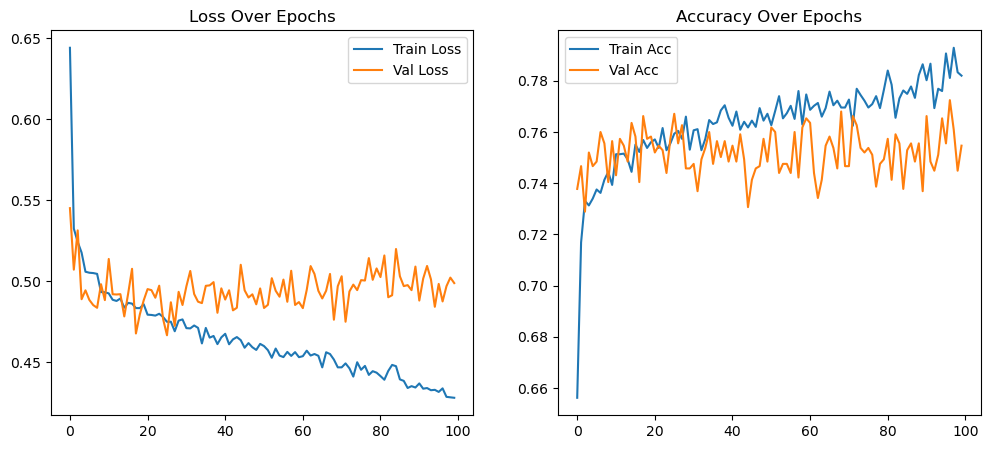

In [276]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.legend(); plt.title('Loss Over Epochs')

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.legend(); plt.title('Accuracy Over Epochs')
plt.show()


In [277]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

y_pred_prob = model.predict(X_test).flatten()
y_pred = (y_pred_prob > 0.5).astype(int)

print("Test Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
Test Accuracy: 0.7569296375266524

Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.76      0.82      1033
           1       0.53      0.76      0.62       374

    accuracy                           0.76      1407
   macro avg       0.71      0.76      0.72      1407
weighted avg       0.80      0.76      0.77      1407

Confusion Matrix:
 [[781 252]
 [ 90 284]]


## HyperParameter Tuning

A hyperparameter tuning process is conducted using Keras Tuner with a RandomSearch strategy to optimize the neural network architecture and training parameters. The model architecture includes two hidden layers with tunable units and dropout rates, and the learning rate of the Adam optimizer is also tuned.

The search is performed over 20 trials, using validation accuracy as the objective. Early stopping is applied during training of the best model to prevent overfitting. Training history is visualized through plots of accuracy and loss over epochs, and the optimized model is evaluated on the test set with accuracy and a classification report. 

In [278]:
!pip install keras-tuner --quiet

In [279]:
import keras_tuner as kt
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

def build_model(hp):
    model = Sequential()
    # First hidden layer
    model.add(Dense(
        units=hp.Int('units_1', min_value=32, max_value=128, step=32),
        activation='relu',
        input_shape=(X_train.shape[1],)
    ))
    model.add(Dropout(hp.Float('dropout_1', 0.0, 0.5, step=0.1)))
    
    # Second hidden layer
    model.add(Dense(
        units=hp.Int('units_2', min_value=16, max_value=64, step=16),
        activation='relu'
    ))
    model.add(Dropout(hp.Float('dropout_2', 0.0, 0.5, step=0.1)))

    # Output layer
    model.add(Dense(1, activation='sigmoid'))

    # Compile model with variable learning rate
    model.compile(
        optimizer=Adam(learning_rate=hp.Choice('learning_rate', [1e-2, 1e-3, 1e-4])),
        loss='binary_crossentropy',
        metrics=['accuracy']
    )
    return model

### Hyperparameter Search

In [289]:
tuner = kt.RandomSearch(
    build_model,
    objective='val_accuracy',
    max_trials=20,
    executions_per_trial=1,
    directory='ann_tuning',
    project_name='churn_prediction'
)

tuner.search(
    X_train, y_train,
    epochs=50,
    batch_size=64,  
    validation_split=0.2
)

Trial 20 Complete [00h 00m 15s]
val_accuracy: 0.8062222003936768

Best val_accuracy So Far: 0.8080000281333923
Total elapsed time: 00h 06m 35s


### Best Model 

In [290]:
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(
    monitor='val_loss',     
    patience=30,             
    restore_best_weights=True 
)


best_model = tuner.get_best_models(num_models=1)[0]
best_hyperparameters = tuner.get_best_hyperparameters(num_trials=1)[0]

print("Best Hyperparameters:", best_hyperparameters.values)

# Train with EarlyStopping
history = best_model.fit(
    X_train, y_train,
    epochs=100,
    batch_size=64,
    validation_split=0.2,
    callbacks=[early_stopping]  
)



Best Hyperparameters: {'units_1': 128, 'dropout_1': 0.1, 'units_2': 48, 'dropout_2': 0.0, 'learning_rate': 0.0001}
Epoch 1/100


c:\Users\sowmy\anaconda3\lib\site-packages\keras\src\saving\saving_lib.py:797: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 14 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8036 - loss: 0.4189 - val_accuracy: 0.8053 - val_loss: 0.4202
Epoch 2/100
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8064 - loss: 0.4177 - val_accuracy: 0.8036 - val_loss: 0.4200
Epoch 3/100
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8087 - loss: 0.4170 - val_accuracy: 0.8062 - val_loss: 0.4207
Epoch 4/100
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8116 - loss: 0.4160 - val_accuracy: 0.8027 - val_loss: 0.4195
Epoch 5/100
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8091 - loss: 0.4136 - val_accuracy: 0.8053 - val_loss: 0.4201
Epoch 6/100
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8091 - loss: 0.4142 - val_accuracy: 0.8044 - val_loss: 0.4205
Epoch 7/100
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8116 - loss: 0.4140 - val_accuracy: 0.8036 - val_loss: 0.4198
Epoch 8/100
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8084 - loss: 0.4142 - val_accuracy: 0.8000 - val_loss: 0.4

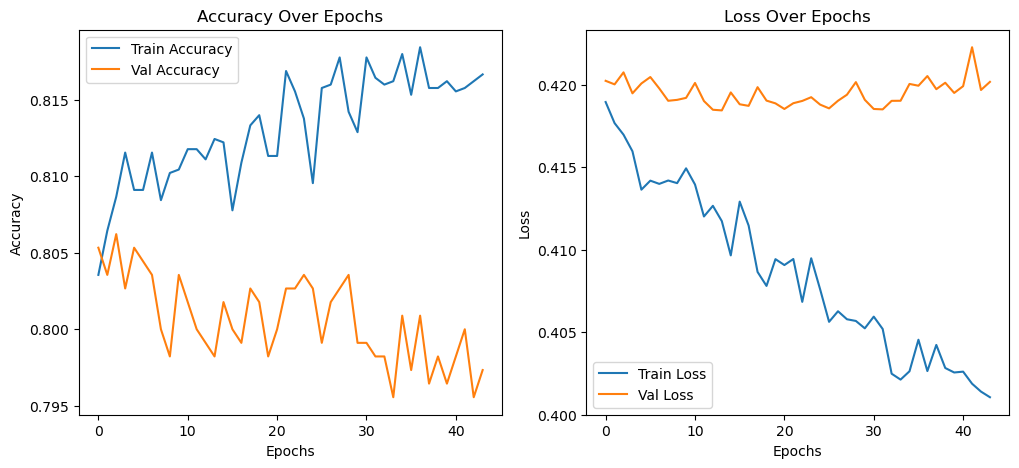

In [291]:
plt.figure(figsize=(12, 5))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Accuracy Over Epochs')
plt.legend()

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss Over Epochs')
plt.legend()

plt.show()


In [292]:
y_pred = (best_model.predict(X_test) > 0.5).astype("int32")
test_loss, test_accuracy = best_model.evaluate(X_test, y_test, verbose=0)

print(f"Test Accuracy: {test_accuracy:.4f}")
print("Classification Report:")
print(classification_report(y_test, y_pred))


44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Test Accuracy: 0.7854
Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.89      0.86      1033
           1       0.62      0.51      0.56       374

    accuracy                           0.79      1407
   macro avg       0.72      0.70      0.71      1407
weighted avg       0.78      0.79      0.78      1407



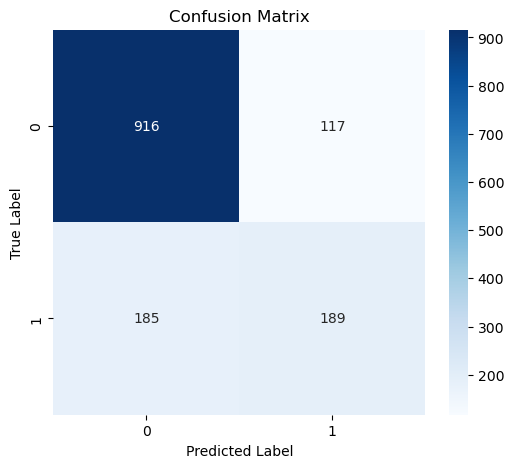

In [294]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=[0,1], yticklabels=[0,1])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()


The final model achieved a test accuracy of 78.54%, performing better on non-churn customers than churn customers. Class 1 (churn) predictions show lower recall and precision, reflecting some difficulty in identifying churn cases, while the weighted F1-score of 0.78 indicates overall balanced performance.